<a href="https://colab.research.google.com/github/Surhan-Memon/household_power_consumption/blob/main/household_power_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Import data
import pandas as pd
df = pd.read_excel('/content/electricity.xlsx')

In [36]:
#checking data
df.head(20)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


In [59]:
#finding columns
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'DateTime'],
      dtype='object')

In [37]:
#pre processing
#checking missing values
missing_values = df.isnull().sum()
print(missing_values)

Date                        0
Time                        0
Global_active_power      4069
Global_reactive_power    4069
Voltage                  4069
Global_intensity         4069
Sub_metering_1           4069
Sub_metering_2           4069
Sub_metering_3           4069
dtype: int64


In [38]:
#handling missing values
fill_values = df.ffill()
print(fill_values)

               Date      Time  Global_active_power  Global_reactive_power  \
0        16/12/2006  17:24:00                4.216                  0.418   
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
4        16/12/2006  17:28:00                3.666                  0.528   
...             ...       ...                  ...                    ...   
1048570  13/12/2008  21:34:00                0.426                  0.076   
1048571  13/12/2008  21:35:00                0.424                  0.076   
1048572  13/12/2008  21:36:00                0.422                  0.076   
1048573  13/12/2008  21:37:00                0.422                  0.078   
1048574  13/12/2008  21:38:00                0.422                  0.078   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0    

In [39]:
#converting date and time columns into datetime
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), dayfirst=True)
df['DateTime'].head()


,DateTime
0,2006-12-16 17:24:00
1,2006-12-16 17:25:00
2,2006-12-16 17:26:00
3,2006-12-16 17:27:00
4,2006-12-16 17:28:00


In [40]:
#checking DateTime column
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [41]:
#drop date and time column
df = df.drop(['Date', 'Time'], axis=1)
print(df)

         Global_active_power  Global_reactive_power  Voltage  \
0                      4.216                  0.418   234.84   
1                      5.360                  0.436   233.63   
2                      5.374                  0.498   233.29   
3                      5.388                  0.502   233.74   
4                      3.666                  0.528   235.68   
...                      ...                    ...      ...   
1048570                0.426                  0.076   242.27   
1048571                0.424                  0.076   242.10   
1048572                0.422                  0.076   241.73   
1048573                0.422                  0.078   242.56   
1048574                0.422                  0.078   242.61   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0                    18.4             0.0             1.0            17.0   
1                    23.0             0.0             1.0            16.0   


In [42]:
#checking datatypes
data_types = df.dtypes
print(data_types)

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
DateTime                 datetime64[ns]
dtype: object


In [43]:
#descriptive stats
descriptive_stats = df.describe()
print(descriptive_stats)

       Global_active_power  Global_reactive_power       Voltage  \
count         1.044506e+06           1.044506e+06  1.044506e+06   
mean          1.108202e+00           1.182732e-01  2.399598e+02   
min           7.600000e-02           0.000000e+00  2.234900e+02   
25%           2.880000e-01           0.000000e+00  2.379700e+02   
50%           5.500000e-01           9.800000e-02  2.402100e+02   
75%           1.544000e+00           1.860000e-01  2.421400e+02   
max           1.067000e+01           1.390000e+00  2.521400e+02   
std           1.129546e+00           1.095062e-01  3.284504e+00   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      1.044506e+06    1.044506e+06    1.044506e+06    1.044506e+06   
mean       4.718123e+00    1.177451e+00    1.475177e+00    5.933837e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.200000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
50%        2.400000e+

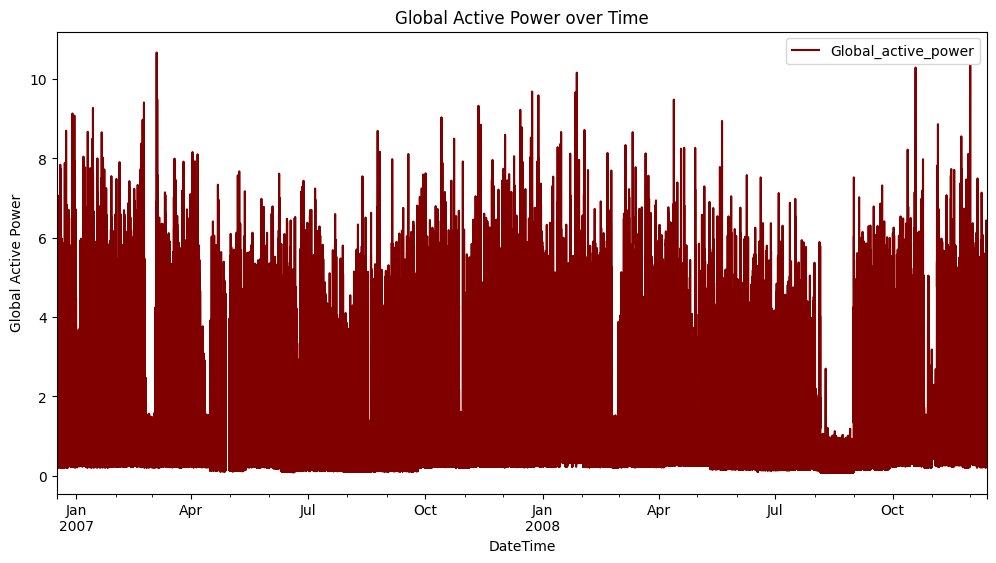

In [57]:
import matplotlib.pyplot as plt
# Ensure DateTime is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], dayfirst=True)
# Create a smaller DataFrame for plotting
df_plot = df[['DateTime', 'Global_active_power']]
# Plot
df_plot.plot(x='DateTime', y='Global_active_power', figsize=(12,6), color = 'maroon')
plt.xlabel('DateTime')
plt.ylabel('Global Active Power')
plt.title('Global Active Power over Time')
plt.show()


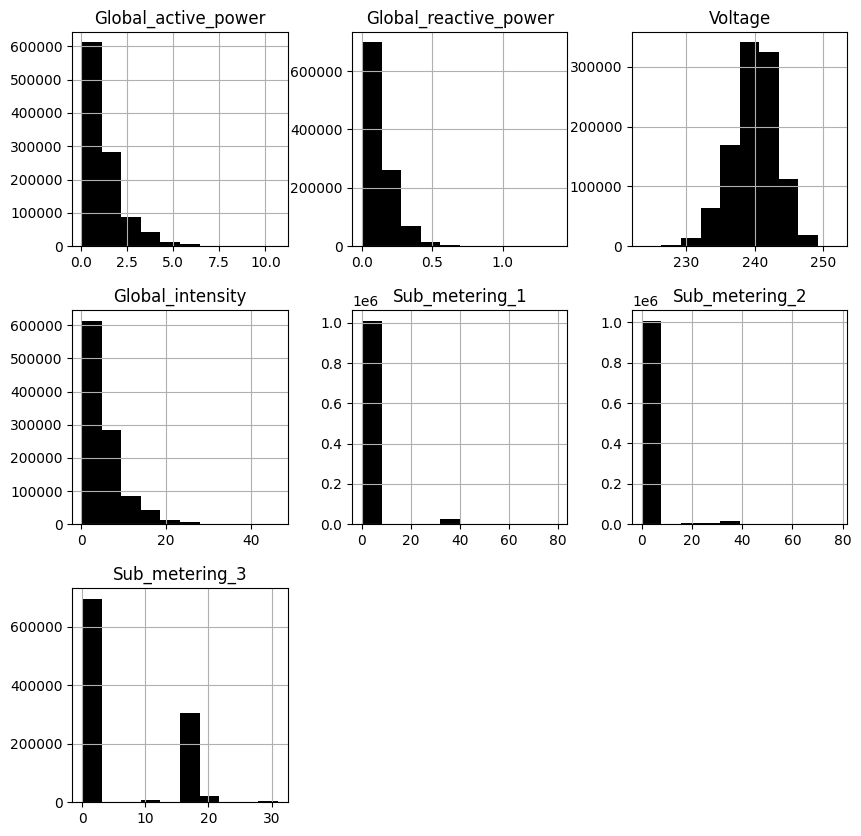

In [56]:
#combining all numercial columns
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
#Plot histograms:
df[numeric_cols].hist(figsize=(10, 10), color = 'black')
plt.show()

0.9990196001620179


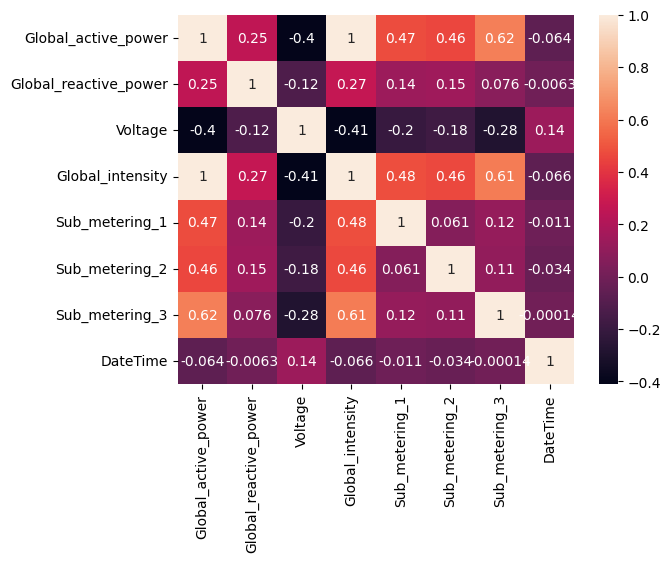

In [23]:
#Check correlations
corr = df['Global_active_power'].corr(df['Global_intensity'])
print(corr)
#plotting
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

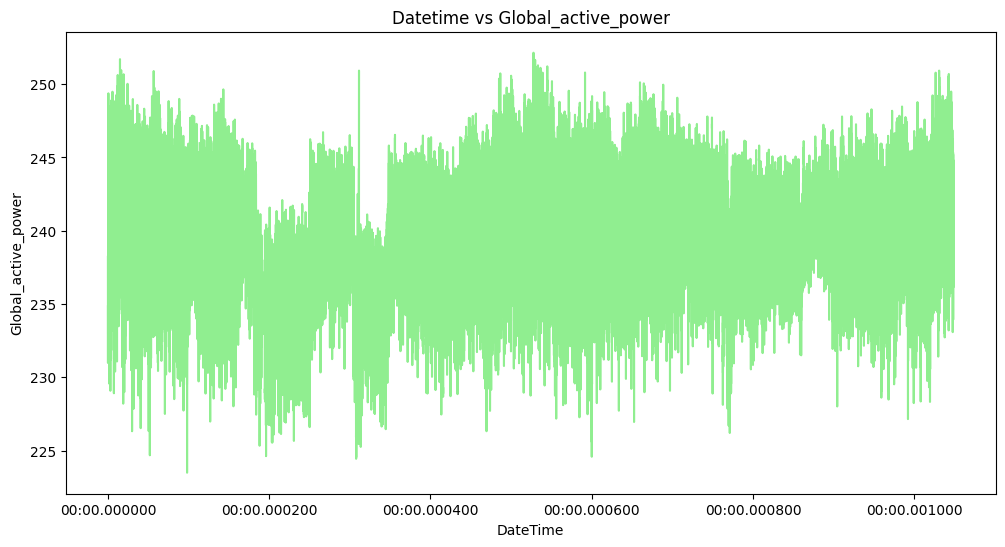

In [55]:
#time series analysis
df.index = pd.to_datetime(df.index)
#plotting voltage over time
plt.figure(figsize=(12, 6))
plt.plot(df['Voltage'], color = 'lightgreen')
plt.xlabel('DateTime')
plt.ylabel('Global_active_power')
plt.title('Datetime vs Global_active_power')
plt.show()

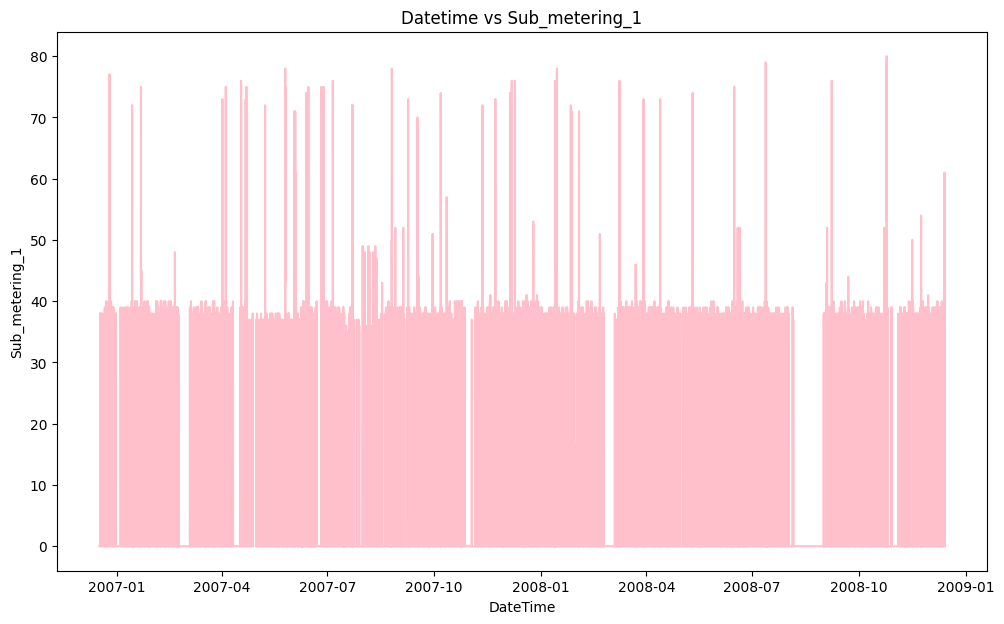

In [52]:
#plot sub_metering_1 over time
plt.figure(figsize=(12, 7))
plt.plot(df['DateTime'] , df['Sub_metering_1'], color = 'pink')
plt.xlabel('DateTime')
plt.ylabel('Sub_metering_1')
plt.title('Datetime vs Sub_metering_1')
plt.show()

In [61]:
#Extract time features
df['hour'] = df['DateTime'].dt.hour
df['day_of_week'] = df['DateTime'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

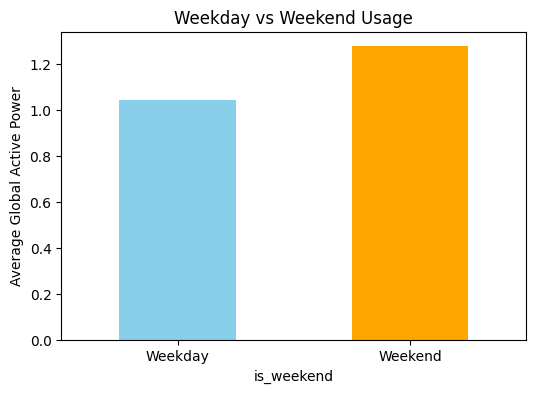

In [62]:
#Weekday vs Weekend usage
weekday_usage = df.groupby('is_weekend')['Global_active_power'].mean()
plt.figure(figsize=(6,4))
weekday_usage.plot(kind='bar', color=['skyblue', 'orange'])
plt.xticks([0,1], ['Weekday', 'Weekend'], rotation=0)
plt.ylabel('Average Global Active Power')
plt.title('Weekday vs Weekend Usage')
plt.show()


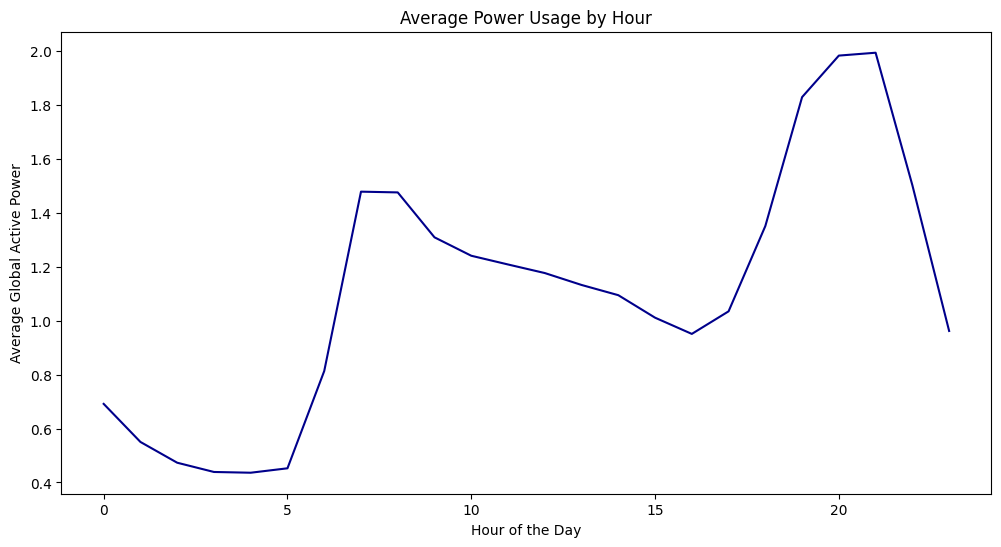

In [64]:
#Day vs Night usage (hourly trends)
hourly_usage = df.groupby('hour')['Global_active_power'].mean()
plt.figure(figsize=(12,6))
plt.plot(hourly_usage.index, hourly_usage.values, color='darkblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Global Active Power')
plt.title('Average Power Usage by Hour')
plt.show()
